In [26]:
!pip install impyute

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cmapPy.pandasGEXpress.parse import parse

## TODO 
1. Find common conversions cell line names. GDSC, DEPMAP_ID, CCLE (link)[https://depmap.org/portal/cell_line/ACH-002270?tab=mutation] show at the top some examples)

# Target data, drug response metric.
GDSC IC50, DEPMAP GI50, any other response datasets we can add?

Row = Cell line
Cols = Drug
meta = dose, timing, metric

First we'll look at the GDSC. Downloaded from GDSC originally, but it seems that DEPMAP has a formatted one. Will start with theirs for now.

In [2]:
gdsc_viability= pd.read_csv('data/depmap_data/sanger-dose-response.csv')

In [7]:
gdsc_viability.head()

,DATASET,COSMIC_ID,DRUG_ID,MIN_CONC,MAX_CONC,RMSE_PUBLISHED,Z_SCORE_PUBLISHED,IC50_PUBLISHED,AUC_PUBLISHED,ARXSPAN_ID,DRUG_NAME,BROAD_ID,upper_limit,ec50,slope,lower_limit,auc,log2.ic50,mse,R2
0,GDSC1,683665,1,0.007813,2.0,0.022518,-0.192056,10.977393,0.982116,ACH-002270,ERLOTINIB,BRD-K70401845,0.992788,2.839376,-5.670993,0.514389,0.990834,NaN,0.000034,0.904675
1,GDSC1,684055,1,0.007813,2.0,0.031831,0.505823,23.133991,0.984820,ACH-002104,ERLOTINIB,BRD-K70401845,1.006405,0.028649,-0.186377,0.990054,0.997138,NaN,0.000057,0.028903
2,GDSC1,684057,1,0.007813,2.0,0.026047,1.280750,52.935278,0.985696,ACH-002106,ERLOTINIB,BRD-K70401845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GDSC1,684059,1,0.007813,2.0,0.110056,0.086028,14.774223,0.972701,ACH-002108,ERLOTINIB,BRD-K70401845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GDSC1,684062,1,0.007813,2.0,0.087010,-0.114395,11.926884,0.944463,ACH-002111,ERLOTINIB,BRD-K70401845,0.989580,0.075804,-12.222777,0.894027,0.933185,NaN,0.000623,0.777093


In [69]:
gdsc_df = gdsc_viability.pivot_table(
    index='ARXSPAN_ID',
    columns='DRUG_NAME',
    values='IC50_PUBLISHED'
).copy()
# gdsc_df.droplevel('DRUG_NAME', axis=1)

In [70]:
gdsc_df.head(5)

DRUG_NAME,(5Z)-7-OXOZEAENOL,5-FLUOROURACIL,681640,"A-443654, KIN001-139","A-770041, KIN001-111",A-83-01,ABT-737,"ACETALAX, OXYPHENISATIN ACETATE",ACY-1215,AFATINIB,...,Y-39983,YK-4-279,YM-155,YM-201636,"Z-LLNLE-CHO, Z-L-NORLEUCINE-CHO",ZG-10,ZIBOTENTAN,ZM-447439,"ZOLEDRONATE, ZOLEDRONIC ACID, ZOMETA, RECLAST",ZSTK-474
ARXSPAN_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,4.616584,418.294185,5.213697,NaN,NaN,64.009787,19.111591,0.411379,3.692867,15.528198,...,317.392126,3.217641,26.782302,88.779521,NaN,1.746451,313.403657,6.240417,94.852590,15.286804
ACH-000002,4.164974,13.475675,3.598997,1.317619,9.453481,75.007867,0.059276,138.574904,1.793663,31.895294,...,23.825180,4.150511,0.003929,7.808134,2.093187,NaN,189.479151,2.543795,22.921332,0.392292
ACH-000004,2.581844,13.198461,1.019421,0.428357,12.294660,85.041043,NaN,272.503648,2.184450,15.873966,...,47.015531,3.468957,0.147151,2.812743,0.771237,NaN,75.906324,6.539168,15.576790,1.548948
ACH-000006,0.055487,1.741805,2.667695,0.113824,29.213064,64.082095,0.657527,NaN,2.381513,9.575032,...,15.650299,3.079992,0.009622,3.265546,1.230248,NaN,179.570340,4.724643,NaN,0.309564
ACH-000007,0.989196,3.993423,9.282232,3.275292,33.195821,55.518817,NaN,222.434794,15.632108,27.688097,...,50.353544,6.091668,1.443373,3.181742,1.334875,9.886261,305.774224,5.496453,96.491508,2.494477


In [92]:
gdsc_df.describe()

DRUG_NAME,(5Z)-7-OXOZEAENOL,5-FLUOROURACIL,681640,"A-443654, KIN001-139","A-770041, KIN001-111",A-83-01,ABT-737,"ACETALAX, OXYPHENISATIN ACETATE",ACY-1215,AFATINIB,...,Y-39983,YK-4-279,YM-155,YM-201636,"Z-LLNLE-CHO, Z-L-NORLEUCINE-CHO",ZG-10,ZIBOTENTAN,ZM-447439,"ZOLEDRONATE, ZOLEDRONIC ACID, ZOMETA, RECLAST",ZSTK-474
count,899.000000,947.000000,917.000000,389.000000,389.000000,896.000000,737.000000,715.000000,907.000000,951.000000,...,901.000000,905.000000,928.000000,902.000000,389.000000,488.000000,902.000000,935.000000,715.000000,902.000000
mean,6.601007,451.166944,47.241294,1.691052,22.063897,87.218638,31.453604,510.448871,15.819337,28.573213,...,144.921331,60.527544,1.113238,20.843598,6.582391,12.131677,272.870629,21.438537,109.057158,8.520050
std,22.205383,1596.524126,359.658953,4.217942,27.737313,85.630855,70.267648,1045.748071,47.445398,40.331991,...,161.978193,364.018948,6.750371,32.624412,18.228969,31.889503,148.786629,83.019291,194.308940,19.730531
min,0.008862,0.203390,0.051588,0.024961,0.006077,2.074433,0.004968,0.041955,0.298400,0.018112,...,0.209979,0.394640,0.000692,0.217106,0.299227,0.171480,5.663284,0.265254,0.807795,0.008292
25%,1.094078,26.706063,3.871133,0.190446,2.650059,39.320172,2.333544,37.403191,2.272697,7.654607,...,30.442602,2.643897,0.004948,3.962117,0.898940,2.038719,176.357802,3.882509,25.049117,0.794788
50%,2.545115,97.574014,8.049295,0.384838,11.007931,59.248189,10.407607,161.695349,5.388171,18.629322,...,91.866368,7.040339,0.014436,9.167311,1.534918,3.816547,243.111469,8.604951,54.997020,2.415679
75%,4.977185,300.164075,21.130321,1.103640,29.892332,102.069201,30.769994,505.254115,11.993259,36.456035,...,202.508123,26.335188,0.067077,21.907565,4.706441,7.718130,337.754755,20.401485,109.970040,6.903604
max,364.487406,23372.806234,10224.327906,46.363847,155.789853,921.914052,1169.988268,9261.719486,782.736411,625.183397,...,1470.643001,7792.076878,87.591938,368.939251,272.488115,328.479358,1414.724371,2384.732354,1896.163664,256.389046


A few notes. Counts for each drug vary
We see large ranges for IC50 (5-FLUOROURACIL min-max = (.2, 23372.))
We saw nans above, see count (number of non-nans) ranges

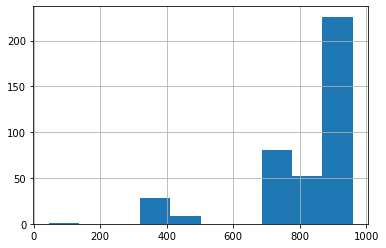

In [94]:
gdsc_df.count().hist();

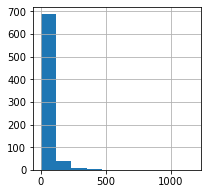

In [71]:
gdsc_df['5-FLUOROURACIL'].hist(figsize=(3, 3));

Log2 transform will move make distributions normal. Also will think about filtering our data down to only keep drugs to where there are enough cell lines.

In [72]:
gdsc_df_log2 = gdsc_df.apply(np.log2)

In [74]:
gdsc_df.shape

(973, 397)

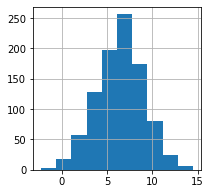

In [99]:
# log2 normalize IC50
gdsc_df_log2['5-FLUOROURACIL'].hist(figsize=(3, 3));

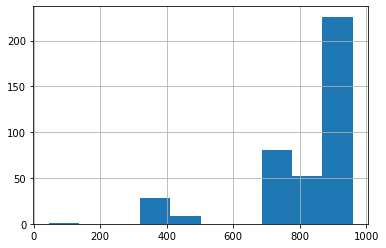

In [98]:
gdsc_df_log2.count().hist();

In [104]:
at_least_500 = gdsc_df_log2.count()[gdsc_df_log2.count() > 500].index.values

In [105]:
gdsc_df_log2[at_least_500].shape

(973, 359)

In [57]:
gdsc_df_log2[at_least_500].to_hdf('gdsc_log2_ic50.h5', key='df', mode='w')

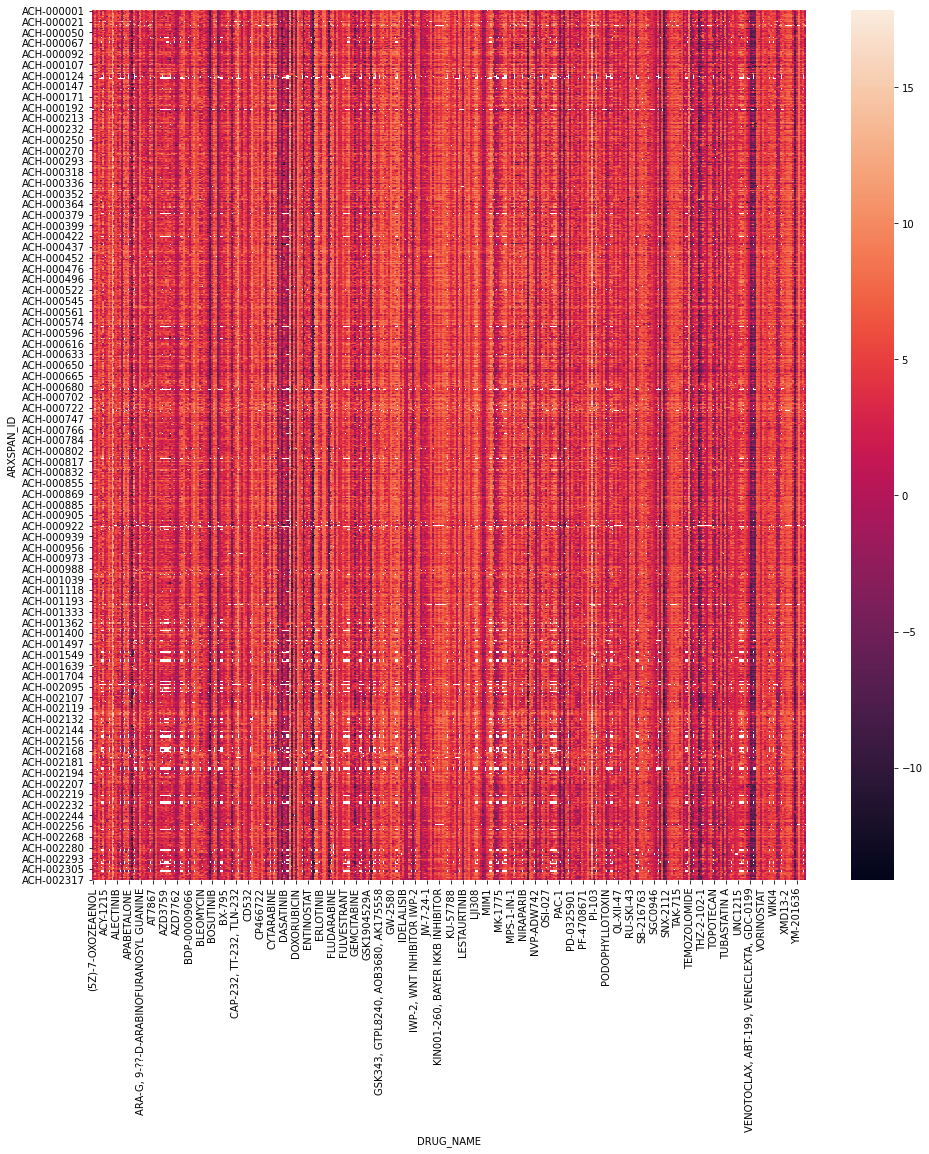

In [108]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111)
sns.heatmap(gdsc_df_log2[at_least_500], ax=ax);

In [4]:
# canonical cell line names
cell_lines = pd.read_csv('data/depmap_data/primary-screen-cell-line-info.csv')
# quick dict for naming
rowname_to_cell_line = cell_lines[['row_name', 'ccle_name']].copy()
rowname_to_cell_line.set_index('row_name', inplace=True)
rowname_to_cell_line

,ccle_name
row_name,
ACH-000824,KYSE510_OESOPHAGUS
ACH-000954,HEC1A_ENDOMETRIUM
ACH-000601,MIAPACA2_PANCREAS
ACH-000651,SW620_LARGE_INTESTINE
ACH-000361,SKHEP1_LIVER
...,...
ACH-001007,A673STAG2KO16_ENGINEERED
ACH-001009,A673STAG2NT14_ENGINEERED
ACH-000078,MHHNB11_AUTONOMIC_GANGLIA


In [80]:
cl_response = pd.read_csv('data/depmap_data/primary-screen-replicate-collapsed-logfold-change.csv')

cl_response.rename({'Unnamed: 0': 'cell_line'}, axis=1, inplace=True)

cell_lines_in_treatment = set(cl_response.cell_line.unique())

In [81]:
# data is stored with broad ids, converting to CCLE cell line names and chemical compounds. Using table provided by depmap 
cl_response.head()

,cell_line,BRD-A00077618-236-07-6::2.5::HTS,BRD-A00100033-001-08-9::2.5::HTS,BRD-A00147595-001-01-5::2.5::HTS,BRD-A00218260-001-03-4::2.5::HTS,BRD-A00376169-001-01-6::2.5::HTS,BRD-A00520476-001-07-4::2.5::HTS,BRD-A00546892-001-02-6::2.5::HTS,BRD-A00578795-001-04-3::2.5::HTS,BRD-A00758722-001-04-9::2.5::HTS,...,BRD-K98557884-001-01-6::2.5::MTS004,BRD-K99077012-001-01-9::2.332734192::MTS004,BRD-K99199077-001-16-1::2.603211317::MTS004,BRD-K99431849-001-01-7::2.500018158::MTS004,BRD-K99447003-335-04-1::2.37737659::MTS004,BRD-K99506538-001-03-8::2.5::MTS004,BRD-K99616396-001-05-1::2.499991421::MTS004,BRD-K99879819-001-02-1::2.5187366::MTS004,BRD-K99919177-001-01-3::2.5::MTS004,BRD-M63173034-001-03-6::2.64076472::MTS004
0,ACH-000001,-0.015577,-0.449332,0.489379,0.206675,0.272730,0.021036,-0.025460,0.467158,-0.736306,...,0.429238,0.204841,0.150055,-0.575404,-0.101247,0.399233,-0.127658,-0.141651,-1.153652,0.510464
1,ACH-000007,-0.095730,0.257943,0.772349,-0.438502,-0.732832,0.779201,0.426523,-1.288508,-0.476133,...,-0.471486,0.212998,-0.123230,0.625527,0.383198,0.212031,0.349225,-0.387439,-0.831461,0.323558
2,ACH-000008,0.379480,-0.596132,0.548056,0.422269,-0.216986,0.081866,0.145335,-0.570841,-0.512119,...,-0.111951,0.534787,0.206642,-0.410153,-0.560722,-0.036088,0.158071,0.171043,-3.947090,0.099310
3,ACH-000010_FAILED_STR,0.118890,-0.231615,0.621937,-0.202707,-1.005139,-0.213739,0.020246,-0.795278,NaN,...,0.200605,-0.075356,0.610310,-0.019413,-0.202971,0.218158,-0.411009,-0.181540,-3.010225,0.090652
4,ACH-000011,0.145346,-0.499274,0.267470,0.157804,-0.272286,0.207768,0.004464,-0.191680,-0.310375,...,-0.076863,0.026002,0.139921,-0.261704,0.085339,0.447482,0.164620,-0.565251,-4.110627,0.222394


In [78]:
cl_response.rename(rowname_to_cell_line.to_dict()['ccle_name'])

,BRD-A00077618-236-07-6::2.5::HTS,BRD-A00100033-001-08-9::2.5::HTS,BRD-A00147595-001-01-5::2.5::HTS,BRD-A00218260-001-03-4::2.5::HTS,BRD-A00376169-001-01-6::2.5::HTS,BRD-A00520476-001-07-4::2.5::HTS,BRD-A00546892-001-02-6::2.5::HTS,BRD-A00578795-001-04-3::2.5::HTS,BRD-A00758722-001-04-9::2.5::HTS,BRD-A00827783-001-24-6::2.5::HTS,...,BRD-K98557884-001-01-6::2.5::MTS004,BRD-K99077012-001-01-9::2.332734192::MTS004,BRD-K99199077-001-16-1::2.603211317::MTS004,BRD-K99431849-001-01-7::2.500018158::MTS004,BRD-K99447003-335-04-1::2.37737659::MTS004,BRD-K99506538-001-03-8::2.5::MTS004,BRD-K99616396-001-05-1::2.499991421::MTS004,BRD-K99879819-001-02-1::2.5187366::MTS004,BRD-K99919177-001-01-3::2.5::MTS004,BRD-M63173034-001-03-6::2.64076472::MTS004
cell_line,,,,,,,,,,,,,,,,,,,,,
NIHOVCAR3_OVARY,-0.015577,-0.449332,0.489379,0.206675,0.272730,0.021036,-0.025460,0.467158,-0.736306,0.644137,...,0.429238,0.204841,0.150055,-0.575404,-0.101247,0.399233,-0.127658,-0.141651,-1.153652,0.510464
LS513_LARGE_INTESTINE,-0.095730,0.257943,0.772349,-0.438502,-0.732832,0.779201,0.426523,-1.288508,-0.476133,-0.277105,...,-0.471486,0.212998,-0.123230,0.625527,0.383198,0.212031,0.349225,-0.387439,-0.831461,0.323558
A101D_SKIN,0.379480,-0.596132,0.548056,0.422269,-0.216986,0.081866,0.145335,-0.570841,-0.512119,0.452698,...,-0.111951,0.534787,0.206642,-0.410153,-0.560722,-0.036088,0.158071,0.171043,-3.947090,0.099310
NaN,0.118890,-0.231615,0.621937,-0.202707,-1.005139,-0.213739,0.020246,-0.795278,NaN,0.679571,...,0.200605,-0.075356,0.610310,-0.019413,-0.202971,0.218158,-0.411009,-0.181540,-3.010225,0.090652
253J_URINARY_TRACT,0.145346,-0.499274,0.267470,0.157804,-0.272286,0.207768,0.004464,-0.191680,-0.310375,0.112537,...,-0.076863,0.026002,0.139921,-0.261704,0.085339,0.447482,0.164620,-0.565251,-4.110627,0.222394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WM2664_SKIN,0.059884,-0.157487,0.030140,0.386968,-1.153988,0.288633,0.690595,-0.200998,-0.796406,0.115201,...,0.678526,0.255822,-0.063099,-0.326424,0.038239,0.140408,-0.378572,0.732354,-1.350145,0.040768
8305C_THYROID,0.159443,-0.156117,0.480380,0.166258,-0.693029,0.334972,0.151108,0.025708,-0.811637,-0.080906,...,0.099624,-0.182114,0.181292,-0.279778,-0.643322,-0.085378,-0.158069,-0.105751,-4.515821,-0.209708
8505C_THYROID,-0.544829,-0.954725,0.695190,0.662730,-0.603988,-0.014424,0.578712,-1.467946,-0.435459,-0.095847,...,0.071582,0.067035,-0.329940,-0.505103,0.066395,0.275095,-0.024510,-0.237596,-2.839291,-0.391083


In [79]:
# rename cell lines
cl_response.rename(rowname_to_cell_line.to_dict()['ccle_name'], inplace=True)
cl_response.head(5)

,BRD-A00077618-236-07-6::2.5::HTS,BRD-A00100033-001-08-9::2.5::HTS,BRD-A00147595-001-01-5::2.5::HTS,BRD-A00218260-001-03-4::2.5::HTS,BRD-A00376169-001-01-6::2.5::HTS,BRD-A00520476-001-07-4::2.5::HTS,BRD-A00546892-001-02-6::2.5::HTS,BRD-A00578795-001-04-3::2.5::HTS,BRD-A00758722-001-04-9::2.5::HTS,BRD-A00827783-001-24-6::2.5::HTS,...,BRD-K98557884-001-01-6::2.5::MTS004,BRD-K99077012-001-01-9::2.332734192::MTS004,BRD-K99199077-001-16-1::2.603211317::MTS004,BRD-K99431849-001-01-7::2.500018158::MTS004,BRD-K99447003-335-04-1::2.37737659::MTS004,BRD-K99506538-001-03-8::2.5::MTS004,BRD-K99616396-001-05-1::2.499991421::MTS004,BRD-K99879819-001-02-1::2.5187366::MTS004,BRD-K99919177-001-01-3::2.5::MTS004,BRD-M63173034-001-03-6::2.64076472::MTS004
cell_line,,,,,,,,,,,,,,,,,,,,,
NIHOVCAR3_OVARY,-0.015577,-0.449332,0.489379,0.206675,0.272730,0.021036,-0.025460,0.467158,-0.736306,0.644137,...,0.429238,0.204841,0.150055,-0.575404,-0.101247,0.399233,-0.127658,-0.141651,-1.153652,0.510464
LS513_LARGE_INTESTINE,-0.095730,0.257943,0.772349,-0.438502,-0.732832,0.779201,0.426523,-1.288508,-0.476133,-0.277105,...,-0.471486,0.212998,-0.123230,0.625527,0.383198,0.212031,0.349225,-0.387439,-0.831461,0.323558
A101D_SKIN,0.379480,-0.596132,0.548056,0.422269,-0.216986,0.081866,0.145335,-0.570841,-0.512119,0.452698,...,-0.111951,0.534787,0.206642,-0.410153,-0.560722,-0.036088,0.158071,0.171043,-3.947090,0.099310
NaN,0.118890,-0.231615,0.621937,-0.202707,-1.005139,-0.213739,0.020246,-0.795278,NaN,0.679571,...,0.200605,-0.075356,0.610310,-0.019413,-0.202971,0.218158,-0.411009,-0.181540,-3.010225,0.090652
253J_URINARY_TRACT,0.145346,-0.499274,0.267470,0.157804,-0.272286,0.207768,0.004464,-0.191680,-0.310375,0.112537,...,-0.076863,0.026002,0.139921,-0.261704,0.085339,0.447482,0.164620,-0.565251,-4.110627,0.222394


In [50]:
#cl_response.isnull().sum().sort_values(ascending=True)

index                                  0
BRD-A73556557-001-06-4::2.5::HTS       3
BRD-K95773607-004-03-8::2.5::HTS       4
BRD-K95785345-300-14-8::2.5::HTS       4
BRD-K75080769-001-01-6::2.5::HTS       4
                                    ... 
BRD-A99888680-001-03-8::2.38::HTS     87
BRD-K56908511-001-01-2::2.5::HTS      89
BRD-K79684402-300-02-8::2.5::HTS      89
BRD-K14003026-003-09-0::2.46::HTS     90
BRD-K59983611-001-21-9::2.5::HTS     114
Length: 4687, dtype: int64

In [52]:
# cl_response.dropna(inplace=True, axis=0)

# possible to replace nans with MICE value
#https://stats.stackexchange.com/questions/421545/multiple-imputation-by-chained-equations-mice-explained

# from impyute.imputation.cs import mice


# imputed = mice(cl_response[['BRD-K59983611-001-21-9::2.5::HTS', 'BRD-K14003026-003-09-0::2.46::HTS', 'BRD-K79684402-300-02-8::2.5::HTS']].values)
# pd.DataFrame(imputed).describe()


# for now (until we settle on drug response, we will just do a simple mean fill)

,0,1,2
count,578.000000,578.000000,578.000000
mean,0.429974,-0.030308,0.194236
std,0.377178,0.564663,0.513409
min,-0.964378,-2.180839,-1.808741
25%,0.255118,-0.301864,-0.072309
50%,0.429974,-0.030308,0.194236
75%,0.604939,0.257028,0.482070
max,1.862668,2.092783,2.040877


In [53]:
cl_response.describe()

,index,BRD-A00077618-236-07-6::2.5::HTS,BRD-A00100033-001-08-9::2.5::HTS,BRD-A00147595-001-01-5::2.5::HTS,BRD-A00218260-001-03-4::2.5::HTS,BRD-A00376169-001-01-6::2.5::HTS,BRD-A00520476-001-07-4::2.5::HTS,BRD-A00546892-001-02-6::2.5::HTS,BRD-A00578795-001-04-3::2.5::HTS,BRD-A00758722-001-04-9::2.5::HTS,...,BRD-K98557884-001-01-6::2.5::MTS004,BRD-K99077012-001-01-9::2.332734192::MTS004,BRD-K99199077-001-16-1::2.603211317::MTS004,BRD-K99431849-001-01-7::2.500018158::MTS004,BRD-K99447003-335-04-1::2.37737659::MTS004,BRD-K99506538-001-03-8::2.5::MTS004,BRD-K99616396-001-05-1::2.499991421::MTS004,BRD-K99879819-001-02-1::2.5187366::MTS004,BRD-K99919177-001-01-3::2.5::MTS004,BRD-M63173034-001-03-6::2.64076472::MTS004
count,578.000000,569.000000,574.000000,569.000000,565.000000,565.000000,569.000000,569.000000,574.000000,550.000000,...,548.000000,547.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,547.000000
mean,288.500000,-0.006395,-0.206873,0.057744,0.243870,-0.168988,0.250923,0.158251,-0.364405,-0.912260,...,0.181034,0.073189,0.018889,-0.219889,0.066081,0.031721,-0.067992,-0.036234,-2.488484,0.132331
std,166.998503,0.468167,0.392711,0.424543,0.360550,0.350263,0.348041,0.327121,0.517283,0.578581,...,0.305363,0.260965,0.383281,0.324267,0.305346,0.285402,0.363420,0.437849,0.905990,0.282700
min,0.000000,-2.006949,-1.707118,-1.835089,-1.241003,-1.430377,-1.001602,-0.983463,-2.440901,-3.669808,...,-0.935436,-0.754616,-1.488856,-1.047564,-0.929322,-0.937268,-1.682306,-1.690859,-4.929646,-0.975505
25%,144.250000,-0.269815,-0.442285,-0.177776,0.017990,-0.385130,0.041051,-0.046105,-0.691554,-1.211599,...,-0.003993,-0.074206,-0.211552,-0.441771,-0.118980,-0.134600,-0.293260,-0.238582,-3.153170,-0.024207
50%,288.500000,0.002517,-0.196187,0.074186,0.253638,-0.164856,0.248475,0.155636,-0.390596,-0.874697,...,0.178406,0.079681,0.034295,-0.209928,0.075889,0.032659,-0.061204,-0.024890,-2.502498,0.142330
75%,432.750000,0.286267,0.046939,0.323343,0.472772,0.046238,0.473595,0.355941,-0.039077,-0.558286,...,0.379671,0.233471,0.250831,-0.019421,0.279441,0.212475,0.152197,0.229306,-1.866919,0.305577
max,577.000000,1.472053,0.996897,1.413485,1.385763,1.019308,1.276779,1.333964,1.781525,1.477549,...,1.023675,1.005874,1.080142,0.812991,0.873084,0.888610,1.390031,1.392972,0.412943,1.193212


In [68]:
# big assumption here. Mean fill values
cl_response.fillna(value=cl_response.mean(), inplace=True)
cl_response.describe()
# seems to be quite a bit of change in the distributions, but will reevaluate 

,BRD-A00077618-236-07-6::2.5::HTS,BRD-A00100033-001-08-9::2.5::HTS,BRD-A00147595-001-01-5::2.5::HTS,BRD-A00218260-001-03-4::2.5::HTS,BRD-A00376169-001-01-6::2.5::HTS,BRD-A00520476-001-07-4::2.5::HTS,BRD-A00546892-001-02-6::2.5::HTS,BRD-A00578795-001-04-3::2.5::HTS,BRD-A00758722-001-04-9::2.5::HTS,BRD-A00827783-001-24-6::2.5::HTS,...,BRD-K98557884-001-01-6::2.5::MTS004,BRD-K99077012-001-01-9::2.332734192::MTS004,BRD-K99199077-001-16-1::2.603211317::MTS004,BRD-K99431849-001-01-7::2.500018158::MTS004,BRD-K99447003-335-04-1::2.37737659::MTS004,BRD-K99506538-001-03-8::2.5::MTS004,BRD-K99616396-001-05-1::2.499991421::MTS004,BRD-K99879819-001-02-1::2.5187366::MTS004,BRD-K99919177-001-01-3::2.5::MTS004,BRD-M63173034-001-03-6::2.64076472::MTS004
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,...,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,-0.006395,-0.206873,0.057744,0.243870,-0.168988,0.250923,0.158251,-0.364405,-0.912260,0.227279,...,0.181034,0.073189,0.018889,-0.219889,0.066081,0.031721,-0.067992,-0.036234,-2.488484,0.132331
std,0.464502,0.391347,0.421219,0.356465,0.346295,0.345316,0.324559,0.515487,0.564368,0.313999,...,0.297318,0.253858,0.373184,0.315725,0.297302,0.277883,0.353846,0.426314,0.882123,0.275001
min,-2.006949,-1.707118,-1.835089,-1.241003,-1.430377,-1.001602,-0.983463,-2.440901,-3.669808,-0.869975,...,-0.935436,-0.754616,-1.488856,-1.047564,-0.929322,-0.937268,-1.682306,-1.690859,-4.929646,-0.975505
25%,-0.264826,-0.440906,-0.175911,0.022884,-0.378775,0.046917,-0.037932,-0.691213,-1.189348,0.034515,...,0.016551,-0.064797,-0.195948,-0.423359,-0.108435,-0.128118,-0.276317,-0.223818,-3.109978,-0.012019
50%,-0.005250,-0.199803,0.066456,0.246446,-0.168988,0.250923,0.158251,-0.389466,-0.904456,0.227279,...,0.181034,0.073189,0.018889,-0.219889,0.066081,0.031721,-0.067992,-0.036234,-2.488484,0.132331
75%,0.284557,0.045154,0.319492,0.469516,0.038196,0.471570,0.352523,-0.039717,-0.565812,0.408726,...,0.362402,0.222332,0.242887,-0.036017,0.267387,0.196746,0.135146,0.217662,-1.902596,0.290961
max,1.472053,0.996897,1.413485,1.385763,1.019308,1.276779,1.333964,1.781525,1.477549,1.368932,...,1.023675,1.005874,1.080142,0.812991,0.873084,0.888610,1.390031,1.392972,0.412943,1.193212


In [55]:
cl_response.sort_index(inplace=True, ascending=False)
cl_response.head(5)

,index,BRD-A00077618-236-07-6::2.5::HTS,BRD-A00100033-001-08-9::2.5::HTS,BRD-A00147595-001-01-5::2.5::HTS,BRD-A00218260-001-03-4::2.5::HTS,BRD-A00376169-001-01-6::2.5::HTS,BRD-A00520476-001-07-4::2.5::HTS,BRD-A00546892-001-02-6::2.5::HTS,BRD-A00578795-001-04-3::2.5::HTS,BRD-A00758722-001-04-9::2.5::HTS,...,BRD-K98557884-001-01-6::2.5::MTS004,BRD-K99077012-001-01-9::2.332734192::MTS004,BRD-K99199077-001-16-1::2.603211317::MTS004,BRD-K99431849-001-01-7::2.500018158::MTS004,BRD-K99447003-335-04-1::2.37737659::MTS004,BRD-K99506538-001-03-8::2.5::MTS004,BRD-K99616396-001-05-1::2.499991421::MTS004,BRD-K99879819-001-02-1::2.5187366::MTS004,BRD-K99919177-001-01-3::2.5::MTS004,BRD-M63173034-001-03-6::2.64076472::MTS004
cell_line,,,,,,,,,,,,,,,,,,,,,
ACH-001321,577,-0.269815,-0.139671,0.169287,0.408545,-0.326806,0.399372,-0.016478,-0.770580,-1.998873,...,0.290243,0.042167,-0.141822,-0.407071,-0.298234,-0.052080,-0.018666,-0.096862,-1.415958,0.185686
ACH-001318,576,-0.012480,-0.065810,0.249521,-0.251258,-0.170861,-0.325158,-0.303747,-1.378993,-0.941142,...,-0.085051,-0.108433,0.865502,-0.469116,-0.143382,0.017683,-0.789759,-0.138915,-3.213087,0.159432
ACH-001307,575,-0.544829,-0.954725,0.695190,0.662730,-0.603988,-0.014424,0.578712,-1.467946,-0.435459,...,0.071582,0.067035,-0.329940,-0.505103,0.066395,0.275095,-0.024510,-0.237596,-2.839291,-0.391083
ACH-001306,574,0.159443,-0.156117,0.480380,0.166258,-0.693029,0.334972,0.151108,0.025708,-0.811637,...,0.099624,-0.182114,0.181292,-0.279778,-0.643322,-0.085378,-0.158069,-0.105751,-4.515821,-0.209708
ACH-001239,573,0.059884,-0.157487,0.030140,0.386968,-1.153988,0.288633,0.690595,-0.200998,-0.796406,...,0.678526,0.255822,-0.063099,-0.326424,0.038239,0.140408,-0.378572,0.732354,-1.350145,0.040768


In [25]:
# Though we don't really need to here, I went a head and converted BRD drug to canonical names

# get canonical drug names, 
drugs = pd.read_csv('data/depmap_data/primary-screen-replicate-collapsed-treatment-info.csv')
drugs.head()

,column_name,broad_id,name,dose,screen_id,moa,target,disease.area,indication,smiles,phase
0,BRD-A00055058-001-01-0::2.325889319::MTS004,BRD-A00055058-001-01-0,RS-0481,2.325889,MTS004,immunostimulant,NaN,NaN,NaN,CC(NC(=O)C1CSCN1C(=O)c1ccccc1)c1ccccc1,Phase 2
1,BRD-A00842753-001-01-9::2.5::MTS004,BRD-A00842753-001-01-9,oleuropein,2.500000,MTS004,estrogen receptor agonist,GPER1,NaN,NaN,COC(=O)C1=COC(OC2OC(CO)C(O)C(O)C2O)\C(=C/C)C1C...,Phase 2
2,BRD-A02232681-001-01-8::2.5::MTS004,BRD-A02232681-001-01-8,isoleucine,2.500000,MTS004,NaN,"ACADSB, BCAT1, BCAT2, IARS, IARS2",NaN,NaN,CCC(C)C(N)C(O)=O,Launched
3,BRD-A04447196-001-01-8::2.5::MTS004,BRD-A04447196-001-01-8,gepefrine,2.500000,MTS004,adrenergic receptor agonist,NaN,cardiology,hypotension,CC(N)Cc1cccc(O)c1,Launched
4,BRD-A04971881-003-01-3::2.65294603::MTS004,BRD-A04971881-003-01-3,cloranolol,2.652946,MTS004,adrenergic receptor antagonist,"ADRB1, ADRB2, ADRB3",NaN,NaN,CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl,Launched


In [69]:
rename_drug = drugs[['column_name', 'name']].drop_duplicates().set_index('column_name').to_dict()['name']
#rename column names to drug names
cl_response.rename(columns=rename_drug, inplace=True)
cl_response.head(5)

,8-bromo-cGMP,nifurtimox,balaglitazone,flutrimazole,KBG,otenzepad,biperiden,zaltoprofen,noretynodrel,dyphylline,...,suritozole,befuraline,hydrocortisone-butyrate,peretinoin,enalaprilat,xenalipin,motesanib,lorlatinib,deslanoside,clonixin-lysinate
cell_line,,,,,,,,,,,,,,,,,,,,,
ACH-000001,-0.015577,-0.449332,0.489379,0.206675,0.272730,0.021036,-0.025460,0.467158,-0.736306,0.644137,...,0.429238,0.204841,0.150055,-0.575404,-0.101247,0.399233,-0.127658,-0.141651,-1.153652,0.510464
ACH-000007,-0.095730,0.257943,0.772349,-0.438502,-0.732832,0.779201,0.426523,-1.288508,-0.476133,-0.277105,...,-0.471486,0.212998,-0.123230,0.625527,0.383198,0.212031,0.349225,-0.387439,-0.831461,0.323558
ACH-000008,0.379480,-0.596132,0.548056,0.422269,-0.216986,0.081866,0.145335,-0.570841,-0.512119,0.452698,...,-0.111951,0.534787,0.206642,-0.410153,-0.560722,-0.036088,0.158071,0.171043,-3.947090,0.099310
ACH-000010_FAILED_STR,0.118890,-0.231615,0.621937,-0.202707,-1.005139,-0.213739,0.020246,-0.795278,-0.912260,0.679571,...,0.200605,-0.075356,0.610310,-0.019413,-0.202971,0.218158,-0.411009,-0.181540,-3.010225,0.090652
ACH-000011,0.145346,-0.499274,0.267470,0.157804,-0.272286,0.207768,0.004464,-0.191680,-0.310375,0.112537,...,-0.076863,0.026002,0.139921,-0.261704,0.085339,0.447482,0.164620,-0.565251,-4.110627,0.222394


# Feature data

Gene expression by cell line. 

In [33]:
# load from CCLE RPKM

# https://data.broadinstitute.org/ccle/CCLE_RNAseq_genes_rpkm_20180929.gct


ccle_rna = parse('data/ccle/CCLE_RNAseq_genes_rpkm_20180929.gct')

# Create dict to convert ENSG id to gene name
rename_gene = ccle_rna.row_metadata_df.reset_index()[['rid', 'Description']].drop_duplicates().set_index('rid').to_dict()['Description']

ccle_rna_d = ccle_rna.data_df.copy()

ccle_rna_d.head(5)

cid,22RV1_PROSTATE,2313287_STOMACH,253JBV_URINARY_TRACT,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,59M_OVARY,639V_URINARY_TRACT,647V_URINARY_TRACT,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,YAPC_PANCREAS,YD10B_UPPER_AERODIGESTIVE_TRACT,YD15_SALIVARY_GLAND,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREAST
rid,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.4,0.053448,0.043078,0.037956,0.028313,0.009377,0.004012,0.017452,0.013608,0.018103,0.029810,...,0.180119,0.102898,0.354700,0.418945,0.270819,0.096412,0.116833,0.025481,0.124122,0.030062
ENSG00000227232.4,5.752560,4.261040,3.100480,3.079090,3.994940,3.356750,2.569410,3.025490,2.787330,2.988130,...,5.420360,2.323580,5.666570,2.795510,2.432770,3.703760,3.163270,3.983540,4.601320,4.563500
ENSG00000243485.2,0.039576,0.011962,0.031618,0.031446,0.020831,0.053477,0.029075,0.040305,0.040212,0.018919,...,0.244510,0.114286,0.472748,0.572692,0.481268,0.091785,0.070780,0.011320,0.127255,0.055648
ENSG00000237613.2,0.037400,0.022608,0.013280,0.026416,0.006562,0.022461,0.018318,0.006348,0.012667,0.017880,...,0.196060,0.164578,0.384714,0.285641,0.363853,0.077102,0.104051,0.000000,0.133623,0.028048
ENSG00000268020.2,0.000000,0.019401,0.025641,0.008501,0.008447,0.000000,0.007860,0.016343,0.000000,0.015343,...,0.144213,0.039722,0.239619,0.135462,0.097575,0.037218,0.095669,0.036722,0.051601,0.018052


In [34]:
ccle_cl_names = list(ccle_rna_d.columns)

ccle_rna_d.reset_index(inplace=True)

ccle_rna_d.columns.name = None
ccle_rna_d.head(5)

# rename ENSG ids to HGNC names
ccle_rna_d['rid'] = ccle_rna_d['rid'].map(rename_gene)
ccle_rna_d.head()

# some genes have duplicate measurments. Weird for RNAseq but will average out for meantime
ccle_rna_d = ccle_rna_d.groupby(['rid']).mean().reset_index()
ccle_genes = list(ccle_rna_d['rid'])
ccle_genes[:10]

ccle_rna_d.set_index('rid', inplace=True)
ccle_rna_d.head(5)

# Pivot so cell line is each row
ccle_rna_d = ccle_rna_d.T

In [43]:
ccle_rna_d.sort_index().head(5)[sorted(ccle_rna_d.columns.values)]

rid,5S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,...,snoZ13_snr52,snoZ178,snoZ185,snoZ247,snoZ40,snoZ5,snoZ6,snosnR60_Z15,snosnR66,yR211F11.2
22RV1_PROSTATE,0.000000,0.024397,0.270077,1.825590,5.115930,1.969560,1.194000,0.020402,0.026568,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065504
2313287_STOMACH,0.011217,0.028300,0.012558,0.026042,1.716790,0.005256,0.223836,0.021925,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
253JBV_URINARY_TRACT,0.002684,0.037085,0.085755,0.131939,0.004387,0.074103,0.000000,0.003622,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
253J_URINARY_TRACT,0.004271,0.021332,0.236609,0.490658,0.025307,0.044527,0.008006,0.006004,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
42MGBA_CENTRAL_NERVOUS_SYSTEM,0.004244,0.004118,3.553860,3.565780,0.012139,0.033564,0.000000,0.003579,0.000000,0.020723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [82]:
# switching to depmap download, before used gct file from ccle directly
ccle_rna2 = pd.read_csv('data/depmap_data/CCLE_expression.csv')
ccle_rna2.rename({'Unnamed: 0': 'cell_line'}, axis=1, inplace=True)
ccle_rna2.set_index('cell_line', inplace=True)

# rename cell line to common id
# ccle_rna2.rename(rowname_to_cell_line.to_dict()['ccle_name'], inplace=True)

# reformat name to remove (#)
ccle_rna2.rename({i: i.split(' (')[0] for i in ccle_rna2.columns.values}, axis=1, inplace=True)

In [83]:
ccle_rna2.sort_index().head(5)[sorted(ccle_rna2.columns.values)]

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
cell_line,,,,,,,,,,,,,,,,,,,,,
ACH-000001,3.122673,0.056584,0.250962,0.111031,0.000000,1.035624,0.176323,5.845741,4.125155,0.815575,...,5.049631,6.695715,0.948601,1.839960,4.696550,3.273516,2.811471,6.825786,3.005400,4.710393
ACH-000002,1.416840,0.000000,0.286881,0.111031,0.000000,0.150560,0.000000,5.221877,1.967169,0.000000,...,3.176323,6.398487,0.056584,0.963474,3.951401,0.000000,1.090853,6.019924,2.195348,3.363171
ACH-000003,1.400538,4.335569,0.321928,0.150560,0.000000,4.207893,0.097611,5.332350,3.931683,1.827819,...,3.931683,7.555049,0.443607,1.475085,2.841973,0.695994,2.321928,7.326340,2.643856,2.961623
ACH-000004,4.180307,0.000000,0.286881,0.344828,0.070389,0.097611,0.000000,6.430620,3.212569,0.000000,...,4.242603,6.119356,0.765535,1.545968,3.617063,0.014355,2.070389,7.036503,3.436961,5.269407
ACH-000005,4.023255,0.014355,0.226509,0.014355,0.000000,0.028569,0.000000,6.397461,3.773996,0.000000,...,5.603181,6.825531,0.765535,1.704872,3.775051,0.014355,2.797013,6.863319,3.524816,5.982994


In [87]:
cl_response.sort_index().head()
cl_response.set_index('cell_line', inplace=True)

In [88]:
merged = ccle_rna2.join(cl_response, how='inner')
merged.head(5)

In [89]:
merged.shape

In [90]:
merged.isnull().sum()

TSPAN6                                          0
TNMD                                            0
DPM1                                            0
SCYL3                                           0
C1orf112                                        0
                                               ..
BRD-K99506538-001-03-8::2.5::MTS004            24
BRD-K99616396-001-05-1::2.499991421::MTS004    24
BRD-K99879819-001-02-1::2.5187366::MTS004      24
BRD-K99919177-001-01-3::2.5::MTS004            24
BRD-M63173034-001-03-6::2.64076472::MTS004     25
Length: 23863, dtype: int64

In [94]:
# average cell line expression for drugs/expression
# should probably do this before and see where its coming from
merged = merged.reset_index().groupby(['cell_line']).mean()
merged = merged.loc[:,~merged.columns.duplicated()]
merged.dropna(inplace=True)
print(merged.shape)

In [97]:
merged.to_hdf('merged_depmap.h5', key='df', mode='w')

In [96]:
merged = pd.read_hdf('merged_depmap.h5', 'df')